In [24]:
%load_ext autoreload
from quantifier import *
from scipy.stats import linregress
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%autoreload 2
lbdfHT,linfodf=readin()

(array([1506.63978945]), array([[12913.00025072]]))
5
15
5
15


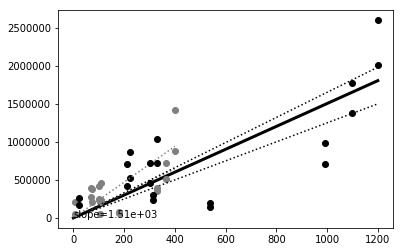

In [66]:
def propo(x,m):
    return m*x

pplus_ngin10uLHT={250:360,150:210,100:15,75:660,50:733.3,37:220,25:800,20:150,15:200,10:140}
pplus_winseqHT={250:51,150:29,100:19,75:14,50:10,37:5,25:5,20:3,15:3,10:2}

#start by getting calibration curve from relevant lanes
std_dfs_=[]
stdlanedf=linfodf[linfodf['sample']=='std']
for std in stdlanedf.index:
    lnum=stdlanedf['lane'].at[std]
    load_uL=stdlanedf['volume'].at[std]
    curdf=lbdfHT[lnum]
    std_dfs_.append(curdf)

    curdf['ng']=[np.nan for x in curdf.index]
    for bidx in curdf.index:
        ngPer10uL=pplus_ngin10uLHT[curdf['Mol. Wt. (KDa)'].at[bidx]]
        ng_loaded=ngPer10uL*(load_uL/10)
        curdf['ng'].at[bidx]=ng_loaded
comp_stdXA_=[std_df['ng'].at[x] for std_df in std_dfs_ for x in std_df.index]
comp_stdYA_=[std_df['Volume (Int)'].at[x] for std_df in std_dfs_ for x in std_df.index]
#comp_std_linregress=linregress(comp_stdXA_,comp_stdYA_)
comp_std_linregress=curve_fit(propo,comp_stdXA_,comp_stdYA_)
comp_std_slope=comp_std_linregress[0][0]
print(comp_std_linregress)
comp_std_fitXA_=np.array([0,max(comp_stdXA_)])
comp_std_fitYA_=np.array([0,comp_std_fitXA_[1]*comp_std_slope])
#comp_std_fitYA_+=comp_std_linregress.intercept


plt.plot(comp_std_fitXA_,comp_std_fitYA_,c='black',lw=3)
plt.text(0,0,'slope={:.2e}'.format(comp_std_slope))
#stdvol=linfodf['volume']
#composite_stdXA_=np.zeros((np.sum([x.shape[0] for x in std_dfs_])))
#composite_stdYA_=np.zeros((np.sum([x.shape[0] for x in std_dfs_])))
#print(len(composite_stdXA_))
for std_df in std_dfs_:
    stdvol=linfodf.loc[linfodf['lane']==std_df['Lane'].iat[0]]['volume'].values[0]
    print(stdvol)
    kwHT={'c':'black'}
    if stdvol<10:
        kwHT['c']='gray'
    plt.plot('ng','Volume (Int)',data=std_df,marker='o',ls=' ',**kwHT)
    cur_linregress=curve_fit(propo,std_df['ng'].values,std_df['Volume (Int)'].values)#,data=std_df)
    cur_std_fitXA_=np.array([0,max(std_df['ng'].values)])
    cur_std_fitYA_=np.array([0,cur_std_fitXA_[1]*cur_linregress[0][0]])
    plt.plot(cur_std_fitXA_,cur_std_fitYA_,**kwHT,ls=':')
    
    #print(curdf['Mol. Wt.'].at[bidx],ng_loaded)
        #curdf['Mol. Wt.'].at[bidx]
        #[]


#    lane_uL=
#    curstd_df=lbdfHT[x]
#    curstd_df['ng']=
#    
#    print(x)
#stdlanes_
#stdsdf.head()
#stdlanes_=[linfodf['lane'].at[x] for x in linfodf]
#linfodf.head()